In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import re
from pprint import pprint
from traffic_analysis import (
    display_shot,
    load_config,
    maximum_measure_points,
    get_colors_from_screenshots,
    show_points_on_screenshot,
)

In [3]:
URL_IMAGE = "./shots/leuven_tiensesteenweg_20231017-114236.png"

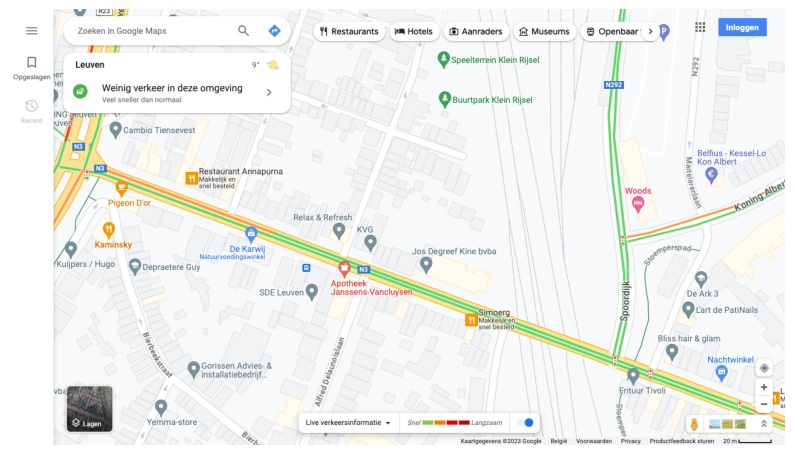

In [4]:
ax = display_shot(URL_IMAGE)
plt.show()

In [5]:
config = load_config("config.toml")

# Print the values
pprint(config)

{'leuven': {'geldenaaksepoort': {'url': 'https://www.google.com/maps/@50.8726718,4.7131464,18z/data=!5m1!1e1'},
            'tiensesteenweg': {'points_from': [[134, 269],
                                               [162, 275],
                                               [260, 312],
                                               [344, 343],
                                               [385, 358],
                                               [427, 374],
                                               [450, 382],
                                               [535, 413],
                                               [605, 439],
                                               [700, 475],
                                               [721, 483],
                                               [840, 527],
                                               [887, 545],
                                               [964, 573],
                                               [1011, 589],
  

In [6]:
streets = list(config["leuven"].keys())
streets

['geldenaaksepoort', 'tiensevest', 'tiensesteenweg', 'tiensestraat']

In [7]:
URL_IMAGE_DIR = "shots"
url_image_dir = Path(URL_IMAGE_DIR)
assert url_image_dir.exists()
location = "leuven"

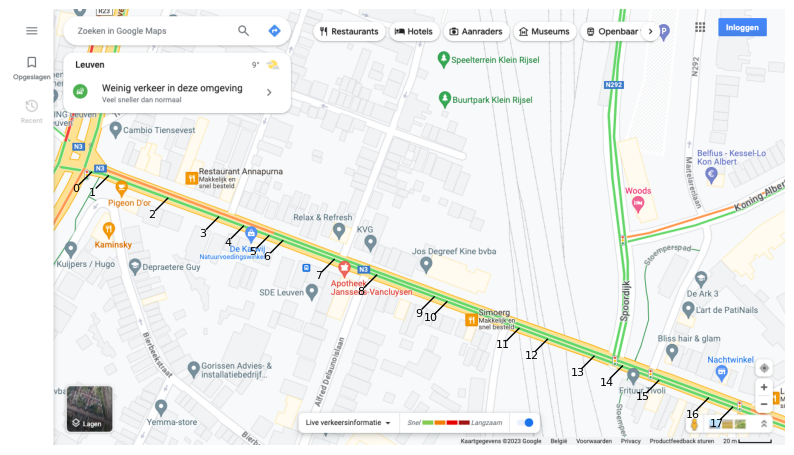

In [8]:
# Plot the points where to measure traffic flow
street = "tiensesteenweg"
direction = "from"
ax = show_points_on_screenshot(config, location, street, URL_IMAGE, direction=direction)

plt.savefig(
    f"meetpunten_{location}_{street}_{direction}.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)
plt.show()

In [9]:
# Determine the maximum point to measure points
# This number will determine the number of columns in the resulting dataframe
max_points, max_location, max_street, max_direction = maximum_measure_points(config)
print(
    f"Maximum number of measurement points is {max_points} in {max_street} in {location} in {max_direction=}"
)

Maximum number of measurement points is 18 in tiensesteenweg in leuven in max_direction='_from'


# Walk over screenshots and sample pixel colors

In [10]:
df = get_colors_from_screenshots(config, url_image_dir, direction=direction)

df.head()

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,...,color_16,p16_red,p16_green,p16_blue,traffic_color_16,color_17,p17_red,p17_green,p17_blue,traffic_color_17
10,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,2023-10-17 11:42:36,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey
12,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,2023-10-17 11:45:40,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey
23,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-115051.png,2023-10-17 11:50:51,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey
8,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-115602.png,2023-10-17 11:56:02,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey
34,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-120113.png,2023-10-17 12:01:13,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey


In [11]:
df.tail()

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,...,color_16,p16_red,p16_green,p16_blue,traffic_color_16,color_17,p17_red,p17_green,p17_blue,traffic_color_17
30,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-174637.png,2023-10-17 17:46:37,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey
21,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-175148.png,2023-10-17 17:51:48,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey
36,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-175659.png,2023-10-17 17:56:59,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey
27,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,2023-10-17 18:02:10,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey
9,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180722.png,2023-10-17 18:07:22,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey


## Inspect the dataframe

In [12]:
df["color_0"].astype(str).unique()

array(['[ 99 214 104]', '[255 151  77]'], dtype=object)

In [13]:
df["color_0"].astype(str).value_counts()

color_0
[ 99 214 104]    38
[255 151  77]     1
Name: count, dtype: int64

## Display all colors that are found in the dataframe at a certain point

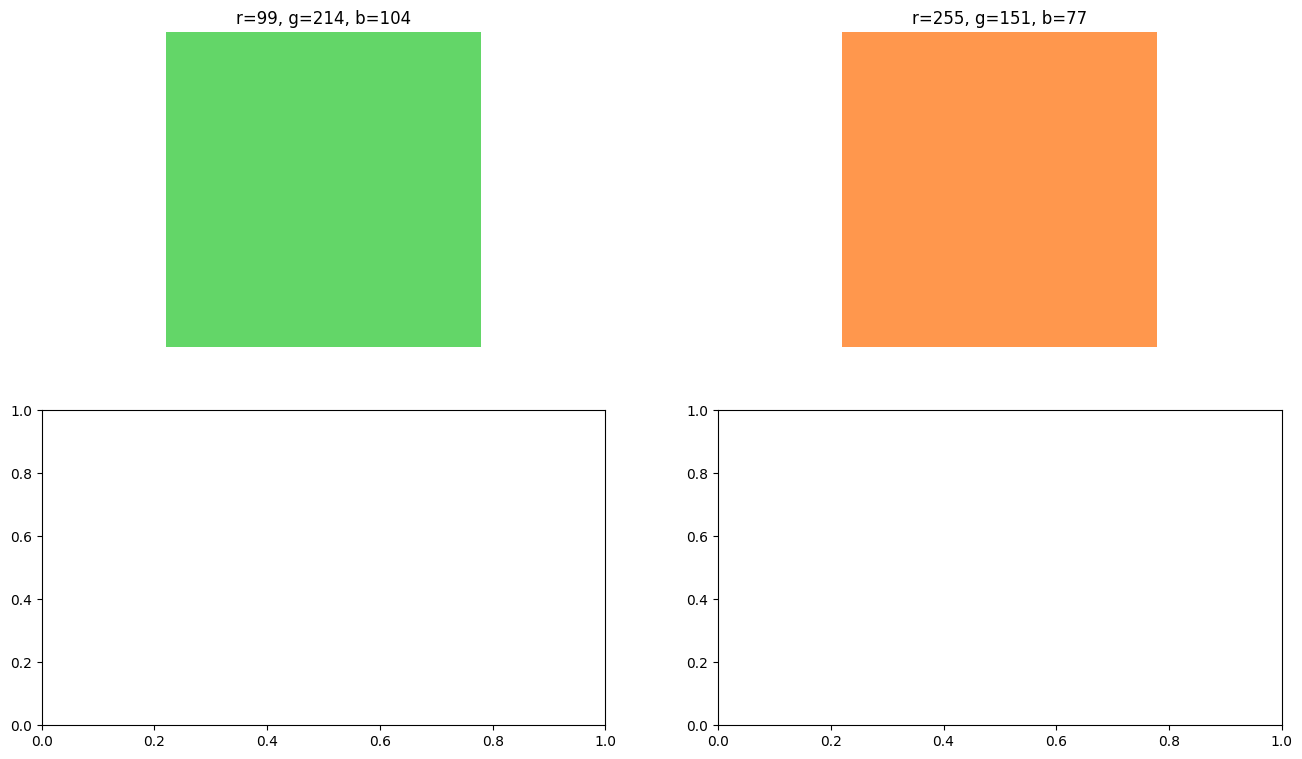

In [14]:
mosaic = [["color_0", "color_1"], ["color_2", "color_3"]]
fig, axd = plt.subplot_mosaic(
    mosaic, gridspec_kw={"width_ratios": [1, 1], "wspace": 0.2}, figsize=(16, 9)
)
colors_in_measure_point = "color_0"
number_of_colors = df[colors_in_measure_point].astype(str).nunique()
assert number_of_colors < len(
    fig.axes
), "Increase the number of axis {len(fig.axes)} to at least {number_of_colors=}"
for idx, (color, ax) in enumerate(
    zip(df[colors_in_measure_point].astype(str).unique(), fig.axes)
):
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r"\d+", color)
    # print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    ax.set_axis_off()
    if idx < number_of_colors:
        ax.imshow([[(r, g, b)]])
        ax.set_title(f"{r=}, {g=}, {b=}")

# Analyse/resample the data and make plot

In [15]:
df = df.sort_values(by="timestamp").reset_index(drop=True).copy()

In [16]:
df["street"].shape

(39,)

In [17]:
df_resampled = df.set_index("timestamp").resample("1Min").ffill()

In [18]:
df_resampled

,location,street,path,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,p1_red,...,color_16,p16_red,p16_green,p16_blue,traffic_color_16,color_17,p17_red,p17_green,p17_blue,traffic_color_17
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 11:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:43:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:44:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:45:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:46:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey


In [19]:
# Remove the first row from the dataframe
df_resampled = df_resampled.reset_index().iloc[1:].set_index("timestamp")
df_resampled.head()

,location,street,path,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,p1_red,...,color_16,p16_red,p16_green,p16_blue,traffic_color_16,color_17,p17_red,p17_green,p17_blue,traffic_color_17
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 11:43:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:44:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:45:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:46:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:47:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey


## Analyse tiensesteenweg

In [20]:
df_street = df_resampled.query("(street == 'tiensesteenweg')")
df_street = df_street[df_street.index > "2023-10-17 15:29:00"]

In [21]:
df_street

,location,street,path,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,p1_red,...,color_16,p16_red,p16_green,p16_blue,traffic_color_16,color_17,p17_red,p17_green,p17_blue,traffic_color_17
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 15:30:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 15:31:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 15:32:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 15:33:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 15:34:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey


### Ascii bar plot

In [22]:
# All column names
# ",".join(df_street.columns)

In [23]:
print_map = {"darkred": "*", "red": "x", "orange": "-", "green": "."}

In [24]:
df_street["traffic_color_9"].unique()

array(['grey', 'orange', 'red'], dtype=object)

In [25]:
for idx, row in df_street.iterrows():
    print(idx, end="")
    for i in range(max_points):
        symbol = print_map.get(row[f"traffic_color_{i}"], ".")
        print(symbol, end="")
    print("\n")

2023-10-17 15:30:00..........----....

2023-10-17 15:31:00..........----....

2023-10-17 15:32:00..........----....

2023-10-17 15:33:00..........----....

2023-10-17 15:34:00..........----....

2023-10-17 15:35:00..........----....

2023-10-17 15:36:00..........----....

2023-10-17 15:37:00..........----....

2023-10-17 15:38:00..........----....

2023-10-17 15:39:00..........----....

2023-10-17 15:40:00..........----....

2023-10-17 15:41:00..........----....

2023-10-17 15:42:00..........----....

2023-10-17 15:43:00----------........

2023-10-17 15:44:00----------........

2023-10-17 15:45:00----------........

2023-10-17 15:46:00----------........

2023-10-17 15:47:00----------........

2023-10-17 15:48:00..........--x-....

2023-10-17 15:49:00..........--x-....

2023-10-17 15:50:00..........--x-....

2023-10-17 15:51:00..........--x-....

2023-10-17 15:52:00..........--x-....

2023-10-17 15:53:00.---------xxxx....

2023-10-17 15:54:00.---------xxxx....

2023-10-17 15:55:00.-----

### matplotlib

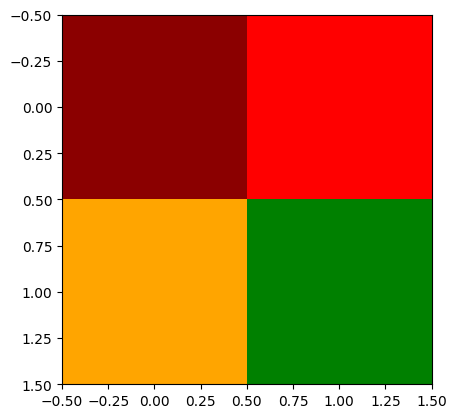

In [26]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["darkred", "red", "orange", "green"]
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

plt.imshow([[0, 1], [2, 3]], cmap=cmap)
plt.show()

In [27]:
df_street.shape

(158, 93)

In [28]:
color_columns = [f"traffic_color_{i}" for i in range(max_points)]
color2index = {"darkred": 0, "red": 1, "orange": 2, "green": 3}
index_columns = []
for idx, colom in enumerate(color_columns):
    df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
    index_columns.append(f"index_color_{idx}")
traffic_color_matrix = df_street[index_columns].fillna(3).to_numpy()
traffic_color_matrix

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]])

In [29]:
traffic_color_matrix.shape

(158, 18)

In [30]:
from matplotlib.text import Text
import matplotlib.dates as mdates

In [31]:
time = df_street.index

In [32]:
traffic_color_matrix.shape

(158, 18)

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_5288/1908682695.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)


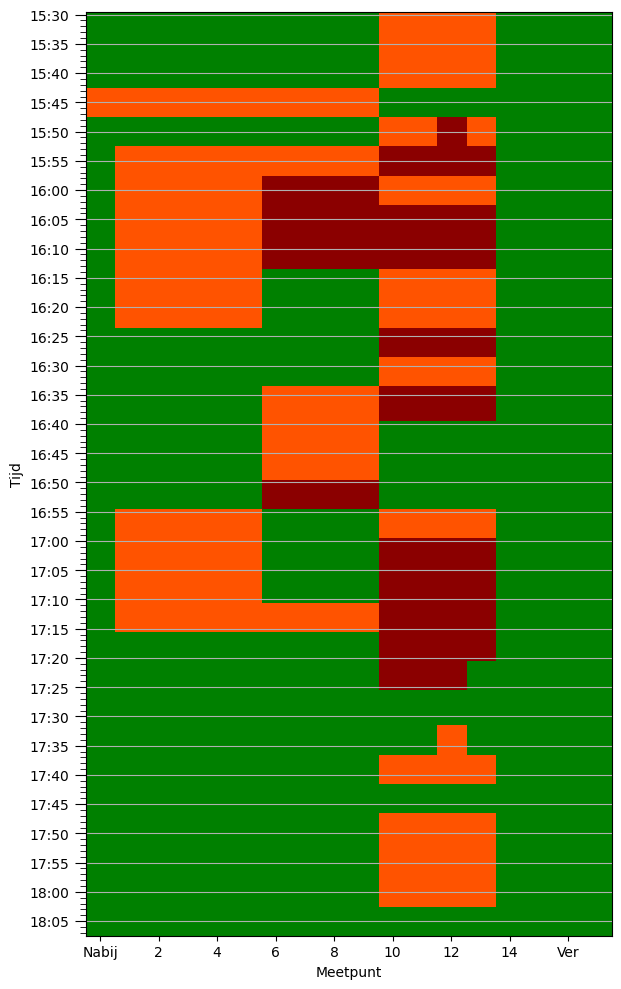

In [33]:
fig, ax = plt.subplots(figsize=(16, 12))
# plt.figure().set_figheight(1)
# plt.figure().set_figwidth(10)

# plt.axis('off');
ax.set_xlabel("Meetpunt")
ax.set_ylabel("Tijd")
# ax.set_xticks([]);
# ax.set_yticks([]);


# # Calculate the number of minutes between each tick
# minutes_per_tick = 1

# # Calculate the total number of ticks based on the number of rows
# num_ticks = len(traffic_color_matrix)

# # Create an array of tick locations
# tick_locations = np.arange(0, num_ticks, minutes_per_tick)

# Create an array of tick labels (assuming they are in minutes)
# tick_labels = [str(i * minutes_per_tick) for i in range(len(tick_locations))]
ticks = df_street.index
tick_labels = [
    f"{tick:%H:%M}" if idx % 5 == 0 else "" for idx, tick in enumerate(ticks)
]
major_tick_labels = [f"{tick:%H:%M}" for idx, tick in enumerate(ticks) if idx % 5 == 0]

# Plot the matrix using imshow on the specified axis
ax.imshow(traffic_color_matrix, cmap=cmap, aspect=0.2)

# Set y-axis tick locations and labels
ax.set_yticks(list(range(df_street.shape[0])), minor=True)
ax.set_yticks(list(range(0, df_street.shape[0], 5)), minor=False)
ax.set_yticklabels(major_tick_labels, minor=False)

# # Remove values for minor tick labels
# minor_labels = ['' for _ in ax.get_yticks(minor=True)]
# ax.set_yticklabels(minor_labels, minor=True)

# # Set the major locator and formatter for y-axis
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # Set major ticks every 5 minutes
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format major ticks as HH:MM

# Set the minor locator and formatter for y-axis
# ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=1))  # Set minor ticks every 1 minute
# ax.yaxis.set_minor_formatter(mdates.DateFormatter('%M'))  # Format minor ticks as minutes


# Customize tick parameters to make major ticks longer
ax.tick_params(axis="y", which="major", size=8)  # Adjust the size as needed
ax.tick_params(axis="y", which="minor", size=4)

# Add gridlines for the y-axis at major y-tick positions
ax.yaxis.grid(True, which="major")

# Hide gridlines for the x-axis
ax.xaxis.grid(False)

# # Remove y-labels for the minor ticks
# ax.set_yticklabels([], minor=True)

# # Set the x-axis major locator to every 15 minutes
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=15))
# # Format the x-axis major ticks as hours and minutes
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ylabels = ax.get_yticklabels()
# for idx, label in enumerate(ylabels):
#     ylabels[idx].set_text('')
#     if idx == 1:
#         ylabels[1].set_text('16u')
#     if idx == len(ylabels)-2:
#         ylabels[-2].set_text('18u')
# ax.set_yticklabels(ylabels);
xlabels = ax.get_xticklabels()
for idx, label in enumerate(xlabels):
    # xlabels[idx].set_text('')
    if idx == 1:
        xlabels[1].set_text("Nabij")
    if idx == len(xlabels) - 1:
        xlabels[-2].set_text("Ver")
ax.set_xticklabels(xlabels)


plt.savefig(
    f"leuven_tiensesteenweg_231017_16u_18u_{direction}.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)  # Set background color to white

In [34]:
df_street

,location,street,path,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,p1_red,...,index_color_8,index_color_9,index_color_10,index_color_11,index_color_12,index_color_13,index_color_14,index_color_15,index_color_16,index_color_17
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 15:30:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2023-10-17 15:31:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2023-10-17 15:32:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2023-10-17 15:33:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2023-10-17 15:34:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
